In [26]:
# Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv
import pandas as pd
from google.colab import files

# URL для завантаження CSV з Google Sheets
url = 'https://docs.google.com/spreadsheets/d/1bclX5PbqE8zR1-wOSM3ZTFa53sIC7RXqwty7Abmw9yQ/export?format=csv'

# Прочитати файл CSV
df = pd.read_csv(url)

In [27]:
# Прочитайте отриману таблицю, використовуючи метод head
print(df.head())

   N                    Посада Мова програмування Спеціалізація  \
0  1        Junior QA engineer                NaN     Manual QA   
1  2        Junior QA engineer                NaN     Manual QA   
2  3         Software Engineer            C#/.NET           NaN   
3  4         Software Engineer         JavaScript           NaN   
4  5  Senior Software Engineer         JavaScript           NaN   

  Загальний досвід роботи Досвід роботи на поточному місці  \
0                     0.5                              0.5   
1         менше 3 місяців                  менше 3 місяців   
2                       4                                1   
3                       5                                4   
4       10 і більше років                              0.5   

   Зарплата на місяць  Зміна зарплати за 12 місяців   Місто   Розмір компанії  \
0                 400                             0  Харків        до 10 осіб   
1                 430                           130  Харків  б

In [28]:
# Визначте розмір таблиці за допомогою методу shape
print(df.shape)

(8704, 25)


In [29]:
# Визначте типи всіх стовпців за допомогою dataframe.dtypes
print(df.dtypes)

N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [30]:
# Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage)

N                                    0.000000
Посада                               0.000000
Мова програмування                  44.232537
Спеціалізація                       82.938879
Загальний досвід роботи              0.000000
Досвід роботи на поточному місці     0.000000
Зарплата на місяць                   0.000000
Зміна зарплати за 12 місяців         0.000000
Місто                                0.000000
Розмір компанії                      0.000000
Тип компанії                         0.000000
Стать                                0.000000
Вік                                  0.000000
Освіта                               0.000000
Університет                          4.113051
Ще студент                           0.000000
Рівень англійської                   0.000000
Предметна область                    2.562040
Дата заповнення                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                   

In [31]:
# Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"
columns_to_keep = ['Мова програмування']
df_no_missing = df.loc[:, df.columns.isin(columns_to_keep) | df.notna().all()]

In [32]:
# Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"
missing_percentage = df_no_missing.isnull().sum() / len(df_no_missing) * 100
print(missing_percentage)

N                                    0.000000
Посада                               0.000000
Мова програмування                  44.232537
Загальний досвід роботи              0.000000
Досвід роботи на поточному місці     0.000000
Зарплата на місяць                   0.000000
Зміна зарплати за 12 місяців         0.000000
Місто                                0.000000
Розмір компанії                      0.000000
Тип компанії                         0.000000
Стать                                0.000000
Вік                                  0.000000
Освіта                               0.000000
Ще студент                           0.000000
Рівень англійської                   0.000000
Дата заповнення                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                      0.000000
salary                               0.000000
dtype: float64


In [33]:
# Видалити усі рядки у вихідній таблиці за допомогою методу dropna
df_cleaned = df_no_missing.dropna()

In [34]:
# Визначити новий розмір таблиці за допомогою методу shape
print(df_cleaned.shape)

(4854, 20)


In [35]:
# Створити нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python
python_data = df_cleaned[df_cleaned['Мова програмування'] == 'Python']

In [36]:
# Визначити розмір таблиці python_data за допомогою методу shape
print(python_data.shape)

(207, 20)


In [37]:
# Використовуючи метод groupby, виконати групування за стовпчиком "Посада"
grouped = python_data.groupby('Посада')

In [38]:
# Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"
salary_stats = grouped['Зарплата на місяць'].agg(['min', 'max']).reset_index()
print(salary_stats)

                     Посада   min   max
0  Junior Software Engineer   100  1250
1  Senior Software Engineer  1300  9200
2         Software Engineer   500  5400
3          System Architect  3000  5000
4            Technical Lead  1425  6200


In [39]:
# Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик "avg"
def fill_avg_salary(row):
    return (row['min'] + row['max']) / 2
salary_stats['avg'] = salary_stats.apply(fill_avg_salary, axis=1)

In [40]:
# Створіть описову статистику за допомогою методу describe для нового стовпчика.
print(salary_stats['avg'].describe())

count       5.000000
mean     3337.500000
std      1700.091909
min       675.000000
25%      2950.000000
50%      3812.500000
75%      4000.000000
max      5250.000000
Name: avg, dtype: float64


In [41]:
# Збережіть отриману таблицю в CSV файл
salary_stats.to_csv('python_salary_stats.csv', index=False)

# Завантажити файл на локальний комп'ютер
files.download('python_salary_stats.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

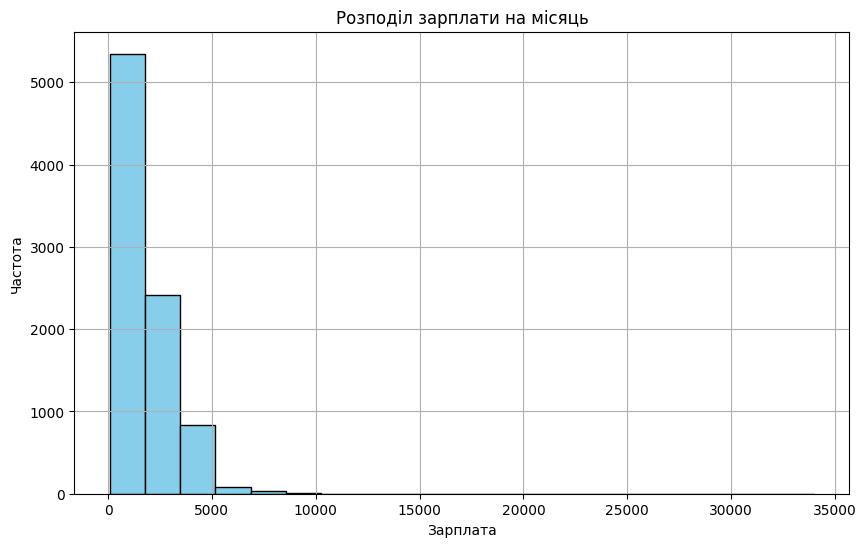

In [42]:
# Гістограма розподілу зарплати на місяць
plt.figure(figsize=(10, 6))
plt.hist(df['Зарплата на місяць'], bins=20, color='skyblue', edgecolor='black')
plt.title('Розподіл зарплати на місяць')
plt.xlabel('Зарплата')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

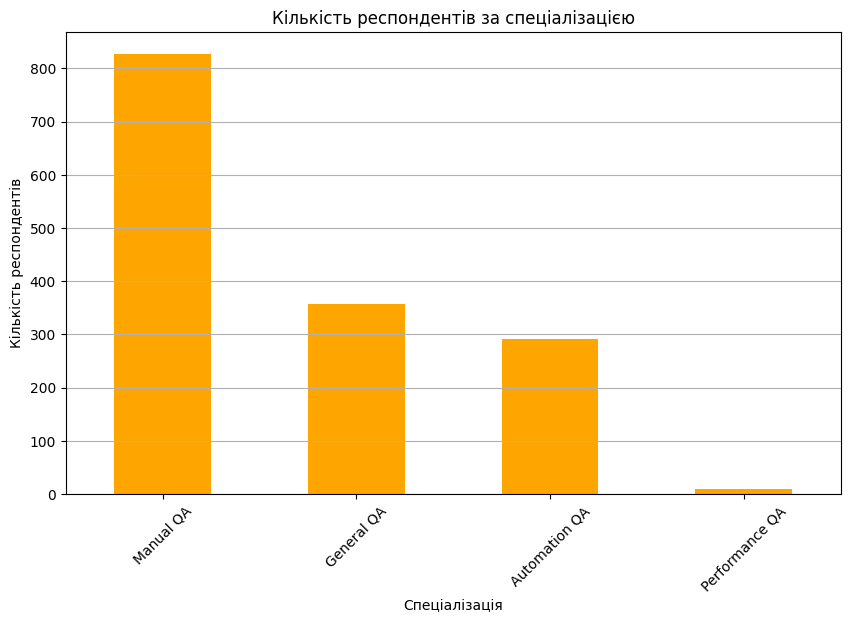

In [43]:
# Графік кількості респондентів за кожною спеціалізацією
plt.figure(figsize=(10, 6))
df['Спеціалізація'].value_counts().plot(kind='bar', color='orange')
plt.title('Кількість респондентів за спеціалізацією')
plt.xlabel('Спеціалізація')
plt.ylabel('Кількість респондентів')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

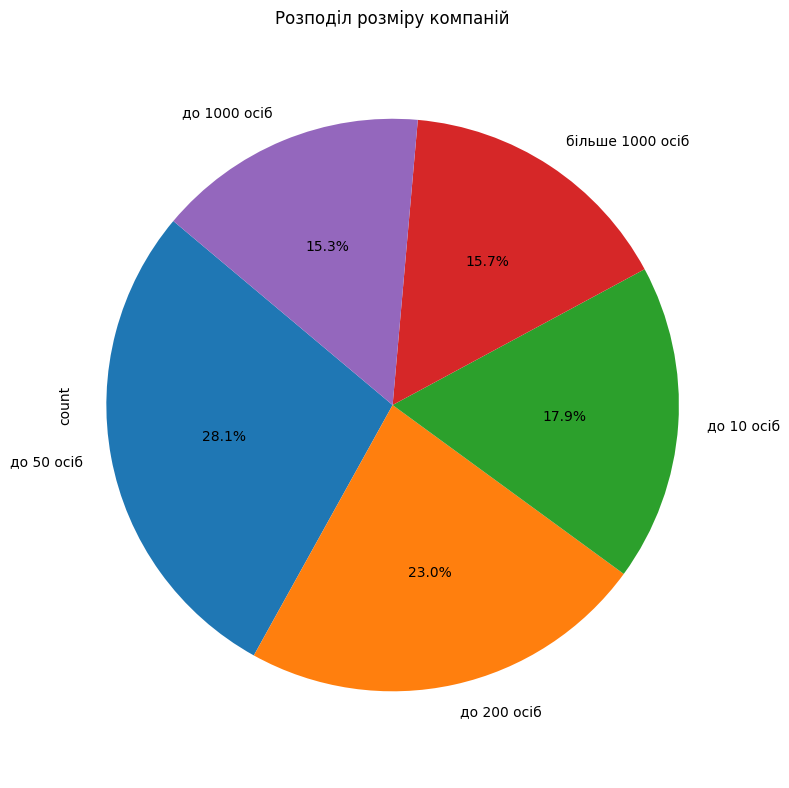

In [44]:
# Кругова діаграма для розподілу розміру компаній
plt.figure(figsize=(8, 8))
df['Розмір компанії'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Розподіл розміру компаній')
plt.axis('equal')
plt.tight_layout()
plt.show()

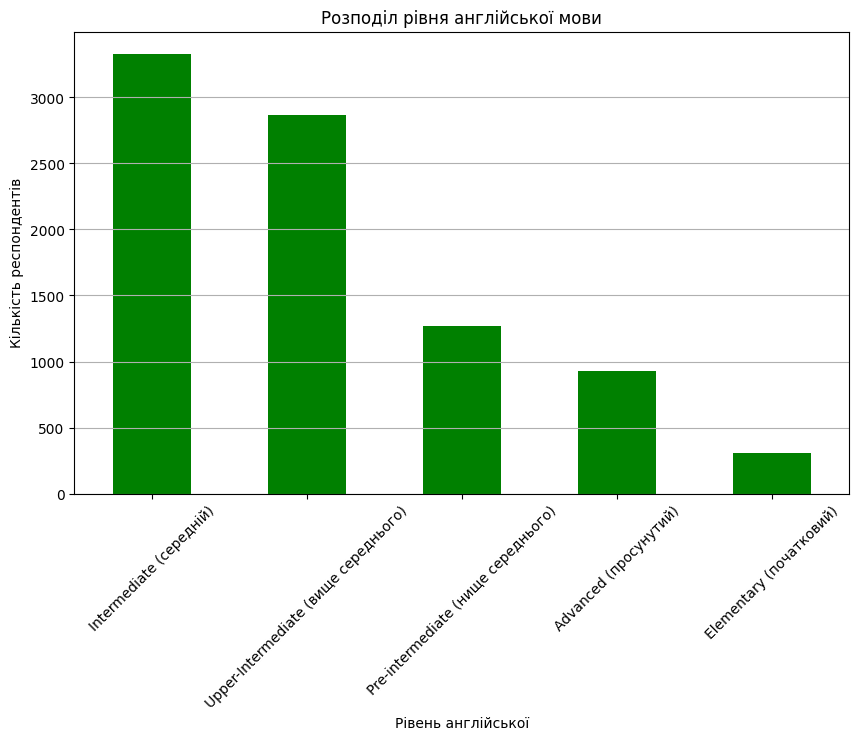

In [45]:
# Стовпчикова діаграма розподілу рівня англійської мови серед респондентів
plt.figure(figsize=(10, 6))
df['Рівень англійської'].value_counts().plot(kind='bar', color='green')
plt.title('Розподіл рівня англійської мови')
plt.xlabel('Рівень англійської')
plt.ylabel('Кількість респондентів')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()